In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Task 1

In [2]:
x_a_train = [-2, -2, -2, -2, -1, -1, -1, -1, -0.8, -0.8, -0.8, -0.8, -0.4, -0.4, -0.4, -0.4,
            0.4, 0.4, 0.8, 0.8, 0.8, 1,   1.5, 1.5]
y_a_train = [-1.5, -1, -0.4, -0.2, -1.5, -1, -0.4, -0.2, -1.5, -1, -0.4, -0.2, -1.5, -1, -0.4, -0.2, 
            1,   0.8, 0.8, 1,   1.5, 0.2, 0.2, 1.5]

In [3]:
x_a_test = [0.2, 0.2, 0.8, 1,   1, 1,   1.5, 1.5]
y_a_test = [0.2, 1.5, 0.2, 0.8, 1, 1.5, 0.8, 1]

In [4]:
x_b_train = [-1.5, -1.5, -1.5, -1,  -1, -1, -1, -0.8, -0.8, -0.8, -0.2, -0.2,
            0.5, 0.5, 0.5, 0.5, 0.8, 0.8, 0.8, 0.8, 1, 1, 1, 1, 1.5, 1.5, 1.5]
y_b_train = [0.4,   0.8,    1, 0.2, 0.4, 1, 1.5, 0.2,  0.8,  1.5, 0.5,  1.5,
            -1.5, -1, -0.8, -0.4, -1.5, -1, -0.8, -0.4, -1.5, -1, -0.8, -0.4, -1.5, -0.8, -0.4, ]

In [5]:
x_b_test = [-1.5, -0.8, -0.2, -0.2, 1.5]
y_b_test = [1.5,    1,    1,   0.8, -1]

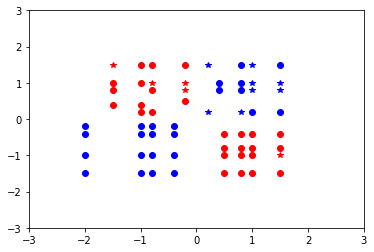

In [6]:
plt.xlim(right=3)
plt.xlim(left=-3)

plt.ylim(top=3)
plt.ylim(bottom=-3)

plt.plot(x_a_train, y_a_train, 'bo', x_a_test, y_a_test, 'b*', 
         x_b_train, y_b_train, 'ro', x_b_test, y_b_test, 'r*')

plt.show()

In [7]:
X_train = []
Y_train = []
for i, j in zip(x_a_train, y_a_train):   # let A be 0 and B to be 1
    X_train.append((i, j))
    Y_train.append(0)

for i, j in zip(x_b_train, y_b_train):   # let A be 0 and B to be 1
    X_train.append((i, j))
    Y_train.append(1)

In [8]:
X_test = []
Y_test = []
for i, j in zip(x_a_test, y_a_test):   # let A be 0 and B to be 1
    X_test.append((i, j))
    Y_test.append(0)

for i, j in zip(x_b_test, y_b_test):   # let A be 0 and B to be 1
    X_test.append((i, j))
    Y_test.append(1)

In [9]:
model = LogisticRegression().fit(X_train, Y_train)

### Score is very low 23%, but it can easily be 100%

The key is in visualization and feature engineering based on visual observations

Hint: try to matematically change values, like: all X coordinates - relative Y coordinates

In [10]:
model.score(X_test, Y_test)

0.23076923076923078

In [11]:
X_train = pd.DataFrame(X_train, columns=["col1", "col2"])
X_test = pd.DataFrame(X_test, columns=["col1", "col2"])

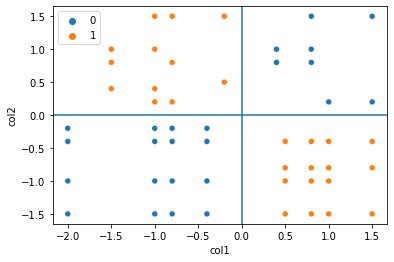

In [12]:
fig, ax = plt.subplots()

sns.scatterplot(data=X_train, x = "col1", y = "col2", hue = Y_train)
ax.axhline(0)
ax.axvline(0)

plt.show()

In [13]:
X_train['multiplication'] = X_train.col1 * X_train.col2

In [14]:
X_test['multiplication'] = X_test.col1 * X_test.col2

In [15]:
new_model = LogisticRegression().fit(X_train[['multiplication']], Y_train)

In [16]:
pred = new_model.predict(X_test[['multiplication']])
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [17]:
new_model.score(X_test[['multiplication']], Y_test)

1.0